# easy Gradient Descent

In [5]:
from sklearn import datasets
import numpy as np


In [64]:
boston = datasets.load_boston()

x = boston.data[:,5].reshape(-1,1)
y = boston.target
x = x[y<50]
y = y[y<50]
x = np.array([0,1,2,3]).reshape(-1,1)
y = np.array([1,4,7,10])

In [65]:
x.shape

(4, 1)

In [66]:
theta = np.zeros(x.shape[1]+1)
theta

array([0., 0.])

In [39]:
#x = np.hstack((np.ones(len(x)).reshape(-1,1),x ))
#x

In [40]:
def getG(x, y, theta):
    x2 = np.hstack((np.ones(len(x)).reshape(-1,1),x ))
    gd = np.zeros(len(theta))
    for i in range(x2.shape[1]):
        v = 0
        for j in range(len(x2)):
            v -= (y[j]-x2[j].dot(theta))*x2[j,i]
       # print(v,len(x))
        gd[i] = v/len(x2)
    print(gd)   
    return gd

In [62]:
def getGbyK( x, y, theta, eps=0.001):
        x2 = np.hstack((np.ones(len(x)).reshape(-1,1),x))
        gd = np.zeros(x.shape[1]+1)
        for i in range(len(theta)):
            ta = np.copy(theta)
            ta[i] += eps
            tb = np.copy(theta)
            tb[i] -= eps
            gd[i] = (getJ(x2, y, ta) - getJ(x2, y, tb))/2*eps
        t = np.max(np.abs(gd))
        return gd/(t+1e-9)

In [44]:
def getJ(x, y, theta):
        return np.sum((y - x.dot(theta))**2)/len(theta)

In [41]:
gd = getG(x, y, theta)

[ -5.5 -12. ]


In [67]:
gd2 = getGbyK(x,y,theta)
gd2

array([-0.45832378, -0.99997917])

In [8]:
gd

array([ -5.5, -12. ])

In [9]:
np.mean(y)

5.5

In [68]:
for i in range(2000):
    gd = getGbyK(x,y,theta)
    theta -= 0.01*gd

In [50]:
import matplotlib.pyplot as plt

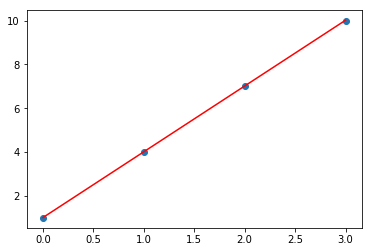

In [69]:
plt.scatter(x, y)
plt.plot(x, x*theta[1]+theta[0], color='r')
plt.show()

In [13]:
theta

array([1.10074104, 2.95281534])

# Gradient Descent Classifier

In [111]:
%run GD.py

In [112]:
gdc = GDCLF()

In [113]:
#gdc.fit(x, y)
#gdc.theta

In [114]:
x = boston.data
y = boston.target

In [115]:
from sklearn.model_selection import train_test_split
xtr, xt, ytr, yt = train_test_split(x, y)

# 容易 overflow，没有 scaling的话

In [46]:
gdc.fit(xtr, ytr, alpha= 0.000001, niter=10000)

In [47]:
yp = gdc.predict(xt)

In [48]:
yp

array([30.2678107 , 22.35408001, 11.81025451, 19.88554033, 27.63846023,
       21.95807897, 25.3799259 , 22.44723864, 34.19747432, 20.83989982,
       22.94820426, 23.54348101, 32.71446079, 21.52922778, 26.12758116,
       17.98711745, 25.83985856, 24.24681075, 23.1486082 , 33.02719821,
       24.02035051, 19.86857711, 28.06117625, 24.99260557,  7.42081432,
       22.9265139 , 21.42521167, 23.72083976, 21.76587733, 20.66974409,
       24.35531918, 23.4300905 , 24.1792647 , 21.4543431 , 34.02393959,
       13.97987396, 27.38441003, 21.33303443, 22.03916704, 23.52228213,
        2.5488928 , 21.2090044 , 19.7978919 , 14.56172327, 25.73451926,
       19.84157285, 25.68698731, 19.42253347, 21.19208227, 32.37601826,
       18.41920611, 25.0386047 , 23.43575878, 16.31153367, 21.55288292,
       24.11265357, 26.30281204, 32.35345205, 21.64185551, 25.49710554,
        2.0490167 , 28.9526717 , 29.4190974 , 21.30426608, 23.17371776,
       18.49799786, 22.8927059 , 23.99341226,  8.27777712, 20.25

In [49]:
y_mean = np.mean(yt)
1 - (yp - yt).dot(yp-yt) / (yt - y_mean).dot(yt-y_mean)

0.18881732579583954

# scaling

In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtr)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [117]:
xtr_standard = sc.transform(xtr)
%timeit gdc.fit4(xtr_standard, ytr, alpha=0.01, niter=2000)

1.69 s ± 132 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [118]:
xt_standard = sc.transform(xt)
yp = gdc.predict(xt_standard)

In [119]:
y_mean = np.mean(yt)
1 - (yp - yt).dot(yp-yt) / (yt - y_mean).dot(yt-y_mean)

0.7322698271259632

In [109]:
t = [1,2,3]
np.random.shuffle(t)


In [110]:
t

[3, 2, 1]

# sklearn GD regression

In [137]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
%time sgd.fit(xtr_standard, ytr)
sgd.score(xt_standard, yt)

Wall time: 999 µs


e:\Anaconda3\envs\py35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7288305602725973

In [4]:
t  = np.array([1,2,3])
t2 = t
t2 = np.copy(t)
t2[0] = 333
t

array([1, 2, 3])